<a href="https://colab.research.google.com/github/Krokodim/schoolmath/blob/master/%D0%A4%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0_%D0%BE%D0%B1%D1%89%D0%B5%D0%B3%D0%BE_%D1%80%D0%B8%D1%81%D0%BA%D0%B0_%D0%B0%D0%B4%D1%80%D0%B5%D1%81%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Расчёт общего риска адреса
Предложение по модификации формулы.

> Материал:  [Расчёт общего риска адреса](https://confluence.inno.tech/pages/viewpage.action?pageId=242826432)



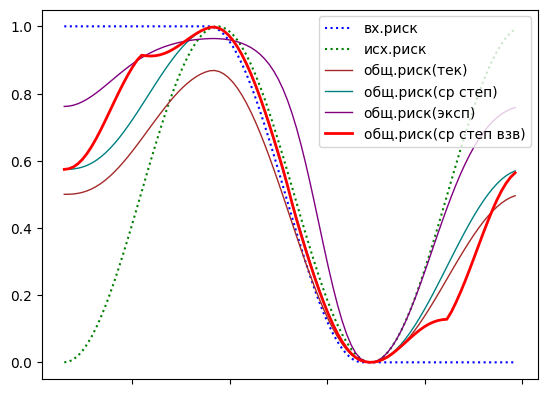

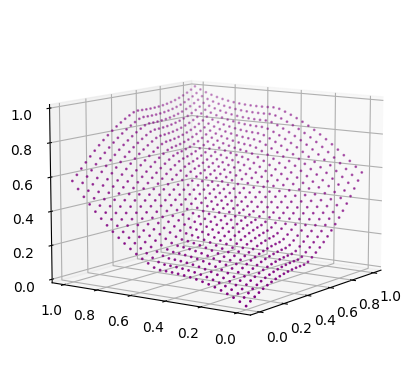

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-np.pi/2+.18, 2.5*np.pi, 100)

def rAgg1 (RIn, ROut):
  # действующая формуда
  k = 1.25
  return 1/2 * (RIn**k + ROut**k)**(1/k)

def rAgg2 (RIn, ROut):
  # среднее степенное с тем же показателем степени
  k = 1.25
  return  ((RIn**k + ROut**k)/2)**(1/k)

def rAgg3 (RIn, ROut):
  # на основе экспоненты (как в эфире)
  return  (np.exp(2*(RIn + ROut))-1) / (np.exp(2*(RIn + ROut))+1)

def getWR(R):
  # получить вес риска для усреднения
  # вес риска растёт по мере приближения его значения к 0 или 1
  if isinstance(R, np.ndarray):
    return np.array([getWR(Ri) for Ri in R])
  else:
    return np.exp((1 - min(R, 1-R))*3)

def rAgg4 (RIn, ROut):
  # улучшенная степ средняя
  k = 1.25
  kRIn  = getWR(RIn)
  kROut = getWR(ROut)

  return ((kRIn * RIn**k + kROut * ROut**k)/(kRIn + kROut))**(1/k)

def plotit(RIn,ROut):

  RAgg1 = rAgg1(RIn,ROut)
  RAgg2 = rAgg2(RIn,ROut)
  RAgg3 = rAgg3(RIn,ROut)
  RAgg4 = rAgg4(RIn,ROut)

  plt.plot (x,RIn,color='blue',linestyle = 'dotted',label='вх.риск')
  plt.plot (x,ROut,color='green',linestyle = 'dotted',label='исх.риск')
  plt.plot (x,RAgg1,color='brown',label='общ.риск(тек)', linewidth=1)
  plt.plot (x,RAgg2,color='teal',label='общ.риск(ср степ)', linewidth=1)
  plt.plot (x,RAgg3,color='purple',label='общ.риск(эксп)', linewidth=1)
  plt.plot (x,RAgg4,color='red',label='общ.риск(ср степ взв)', linewidth=2)

  plt.legend(loc = 'upper right')
  plt.gca().axes.xaxis.set_ticklabels([])
  plt.show()


def getRIn(x):
  # модельная кривая входящего риска
  if x < np.pi/2:
    return 1
  if x > 3/2*np.pi:
    return 0
  return .50 + .50*np.sin(x)

def getROut(x):
  # модельная кривая исходящего риска
  return .50+.50*np.sin(x-.18)

rin = np.array([getRIn(xi) for xi in x])
rout = np.array([getROut(xi) for xi in x])

plotit(rin,rout)

ax = plt.axes(projection="3d")

X = np.linspace(0,1,30)
Y = np.linspace(0,1,30)

# Creating a mesh grid of X and Y
X, Y = np.meshgrid(X, Y)

Z = rAgg4(X,Y)



ax.scatter(X,Y,Z,s=1, color='purple')
ax.set_zlim(0,1)
ax.view_init(10, 215)